# Description: 

The dataset is caled "Wine recognition data". The sources is from: 

     (a) Forina, M. et al, PARVUS - An Extendible Package for Data
        Exploration, Classification and Correlation. Institute of Pharmaceutical
        and Food Analysis and Technologies, Via Brigata Salerno, 
        16147 Genoa, Italy.
        
There are totally 178 instances in this dataset. The target value has three possible values, which are categorical. 

The feature dimension is 13. Each feature stands for different meaning which can be understood by human. All features are continuous variables. 

They are :

"Alcohol", "Malic acid", "Ash", "Alcalinity of ash", "Magnesium", "Total phenols", "Flavanoids", "Nonflavanoid phenols", "Proanthocyanins", "Color intensity", "Hue", "OD280/OD315 of diluted wines", "Proline" 

The distribution of dataset is as follows: class1: 59, class2: 71, class3: 48.

In [1]:
import pandas as pd
import numpy as np

from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score

from sklearn import tree

import graphviz 

In [2]:
def plot_DT(clf, feature_names, target_names):
    
    dot_data = tree.export_graphviz(clf, out_file=None, 
                         feature_names=feature_names,  
                         class_names=target_names,  
                         filled=True, rounded=True,  
                         special_characters=True)
    
    graph = graphviz.Source(dot_data) 
    
    return graph

In [3]:
header = ["Label", "Alcohol", "Malic acid", "Ash", "Alcalinity of ash", "Magnesium", "Total phenols", 
          "Flavanoids", "Nonflavanoid phenols", "Proanthocyanins", "Color intensity", "Hue", 
          "OD280/OD315 of diluted wines", "Proline"]

target_names = ["class1", "class2", "class3"]

table = pd.read_table("./wine.data", names=header, delimiter=',')

In [4]:
matrix = np.array(table)

X = matrix[:, 1:]

y = matrix[:, 0]

X.shape

(178, 13)

In [5]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=42)

### max_depth = 1

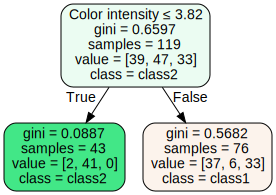

In [6]:
# max_depth = 1

clf = DecisionTreeClassifier(random_state=0, max_depth=1)
clf.fit(X_train, y_train)

train_error = accuracy_score(y_train, clf.predict(X_train))

test_error = accuracy_score(y_test, clf.predict(X_test))

graph = plot_DT(clf, header[1:], target_names)
graph

In [7]:
print("The train accuracy is %f \t\t\t The test accuracy is %f" %(train_error, test_error))

The train accuracy is 0.655462 			 The test accuracy is 0.627119


### max_depth = 2

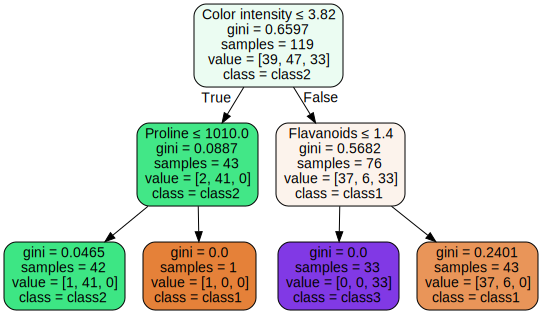

In [8]:
# max_depth = 2

clf = DecisionTreeClassifier(random_state=0, max_depth=2)
clf.fit(X_train, y_train)

train_error = accuracy_score(y_train, clf.predict(X_train))

test_error = accuracy_score(y_test, clf.predict(X_test))

graph = plot_DT(clf, header[1:], target_names)
graph

In [9]:
print("The train accuracy is %f \t\t\t The test accuracy is %f" %(train_error, test_error))

The train accuracy is 0.941176 			 The test accuracy is 0.881356


### max_depth = 3

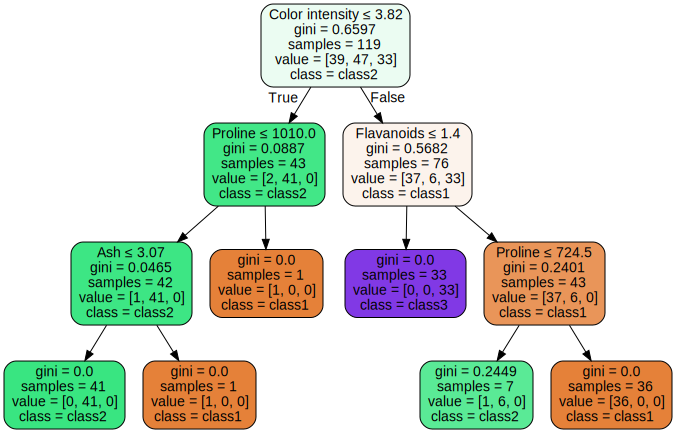

In [10]:
# max_depth = 3

clf = DecisionTreeClassifier(random_state=0, max_depth=3)
clf.fit(X_train, y_train)

train_error = accuracy_score(y_train, clf.predict(X_train))

test_error = accuracy_score(y_test, clf.predict(X_test))

graph = plot_DT(clf, header[1:], target_names)
graph

In [11]:
print("The train accuracy is %f \t\t\t The test accuracy is %f" %(train_error, test_error))

The train accuracy is 0.991597 			 The test accuracy is 0.966102


### max_depth = 4

In [12]:
# max_depth = 4

clf = DecisionTreeClassifier(random_state=0, max_depth=4)
clf.fit(X_train, y_train)

train_error = accuracy_score(y_train, clf.predict(X_train))

test_error = accuracy_score(y_test, clf.predict(X_test))

print("The train accuracy is %f \t\t\t The test accuracy is %f" %(train_error, test_error))

The train accuracy is 1.000000 			 The test accuracy is 0.966102


### max_depth = 5

In [13]:
# max_depth = 5

clf = DecisionTreeClassifier(random_state=0, max_depth=5)
clf.fit(X_train, y_train)

train_error = accuracy_score(y_train, clf.predict(X_train))

test_error = accuracy_score(y_test, clf.predict(X_test))

print("The train accuracy is %f \t\t\t The test accuracy is %f" %(train_error, test_error))

The train accuracy is 1.000000 			 The test accuracy is 0.966102


### max_depth = 6

In [14]:
# max_depth = 6

clf = DecisionTreeClassifier(random_state=0, max_depth=6)
clf.fit(X_train, y_train)

train_error = accuracy_score(y_train, clf.predict(X_train))

test_error = accuracy_score(y_test, clf.predict(X_test))

print("The train accuracy is %f \t\t\t The test accuracy is %f" %(train_error, test_error))

The train accuracy is 1.000000 			 The test accuracy is 0.966102


1. From the graph, we can see that when max_depth == 3, the first 2 depth layers are exactly same with previous ones. It makes sense since max depth won't affect the calculation of information gain in the previous steps. 

2. Training error is decreasing when the max_depth increases. Also it can be consider that max_depth indicates the complexity of model. When max_depth is larger, we can assume model learns training data well, and it can be optimized as zero trainning error. In this case, when max_depth >= 4, the accuracy of training is 1.  

3. Test accuracy stops growing when max_depth == 3. This means the model is already getting its maximu performance in this train-test split. 

